## Install packages

In [ ]:
# !pip install torch torchvision opencv-python numpy matplotlib scikit-learn tqdm Pillow

## Clone Code from GitHub

**Strategy:** Get code from GitHub (always up-to-date) + Data from Drive (large files).


In [27]:
# Clone repository from GitHub
import os

GITHUB_REPO = "https://github.com/Barbare997/Final_Project_DL.git"
PROJECT_DIR = "/content/deep_learning_final_project"

if os.path.exists(PROJECT_DIR):
    print(f"Repository already cloned at {PROJECT_DIR}")
else:
    !git clone {GITHUB_REPO} {PROJECT_DIR}
    print(f"Repository cloned successfully!")

import sys
sys.path.insert(0, os.path.join(PROJECT_DIR, 'src'))
print(f"Added {PROJECT_DIR}/src to Python path")

Repository already cloned at /content/deep_learning_final_project
Added /content/deep_learning_final_project/src to Python path


## Mount Google Drive and Copy Data

**Strategy:** Copy data from Drive to local storage for fast training.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

DRIVE_DATA_PATH = '/content/drive/MyDrive/data'
LOCAL_DATA_PATH = '/content/data'

import shutil
import os

# Copy data from Drive to local storage (for fast training)
if os.path.exists(DRIVE_DATA_PATH):
    if os.path.exists(LOCAL_DATA_PATH):
        print("Local data folder already exists, skipping copy")
    else:
        shutil.copytree(DRIVE_DATA_PATH, LOCAL_DATA_PATH)
        print(f"Data copied successfully to {LOCAL_DATA_PATH}")
else:
    print(f"WARNING: Data not found at {DRIVE_DATA_PATH}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Local data folder already exists, skipping copy


## Setup

In [29]:
import torch
print(f"CUDA: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("WARNING: No GPU detected. Training will be slow on CPU.")

CUDA: True
GPU: Tesla T4


## Check data

In [32]:
data_dir = "data"
if os.path.exists(data_dir):
    for split in ['train', 'val', 'test']:
        split_path = os.path.join(data_dir, split)
        if os.path.exists(split_path):
            classes = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
            print(f"{split}: {len(classes)} classes")
        else:
            print(f"{split} folder missing")
else:
    print("data folder not found")

train: 7 classes
val: 7 classes
test: 7 classes


## Train model

Pulling latest code from GitHub...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 383 bytes | 383.00 KiB/s, done.
From https://github.com/Barbare997/Final_Project_DL
   73f8c69..631688c  main       -> origin/main
Updating 73f8c69..631688c
Fast-forward
 src/model.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)

Clearing Python module cache...
✓ Removed 58 cached modules

Verifying class weights fix...

Importing fresh modules...

Starting training with class weights fix...

EMOTION RECOGNITION CNN - TRAINING

Using device: cuda
GPU: Tesla T4
CUDA Version: 12.6

Loading data from: data
Batch size: 64, Workers: 2
Found 7 emotion classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Training batches: 359, Validation batches: 90

Creating CNN model with 7 output classes...
Total 

Validating: 100%|██████████| 90/90 [00:01<00:00, 50.22it/s]



Results:
  Training   - Loss: 1.8227, Accuracy: 24.62%
  Validation - Loss: 1.7904, Accuracy: 25.15%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +25.15%)
  Saved to: models/cnn_model.pth

Epoch 2/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.48it/s]



Results:
  Training   - Loss: 1.7979, Accuracy: 25.44%
  Validation - Loss: 1.7707, Accuracy: 25.76%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.61%)
  Saved to: models/cnn_model.pth

Epoch 3/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.73it/s]



Results:
  Training   - Loss: 1.7534, Accuracy: 27.54%
  Validation - Loss: 1.7100, Accuracy: 30.10%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +4.34%)
  Saved to: models/cnn_model.pth

Epoch 4/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.25it/s]



Results:
  Training   - Loss: 1.7165, Accuracy: 29.76%
  Validation - Loss: 1.6348, Accuracy: 33.61%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +3.50%)
  Saved to: models/cnn_model.pth

Epoch 5/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.98it/s]



Results:
  Training   - Loss: 1.6509, Accuracy: 34.23%
  Validation - Loss: 1.5109, Accuracy: 41.92%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +8.31%)
  Saved to: models/cnn_model.pth

Epoch 6/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 48.73it/s]



Results:
  Training   - Loss: 1.5498, Accuracy: 39.32%
  Validation - Loss: 1.4082, Accuracy: 45.39%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +3.47%)
  Saved to: models/cnn_model.pth

Epoch 7/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 51.27it/s]



Results:
  Training   - Loss: 1.4773, Accuracy: 42.32%
  Validation - Loss: 1.3527, Accuracy: 48.09%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +2.70%)
  Saved to: models/cnn_model.pth

Epoch 8/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 51.62it/s]



Results:
  Training   - Loss: 1.4322, Accuracy: 44.33%
  Validation - Loss: 1.2885, Accuracy: 49.80%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +1.71%)
  Saved to: models/cnn_model.pth

Epoch 9/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 47.98it/s]



Results:
  Training   - Loss: 1.4013, Accuracy: 46.13%
  Validation - Loss: 1.2662, Accuracy: 51.07%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +1.27%)
  Saved to: models/cnn_model.pth

Epoch 10/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 46.09it/s]



Results:
  Training   - Loss: 1.3793, Accuracy: 47.04%
  Validation - Loss: 1.2452, Accuracy: 51.73%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.66%)
  Saved to: models/cnn_model.pth

Epoch 11/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 41.31it/s]



Results:
  Training   - Loss: 1.3596, Accuracy: 47.43%
  Validation - Loss: 1.2330, Accuracy: 53.08%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +1.34%)
  Saved to: models/cnn_model.pth

Epoch 12/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 39.50it/s]



Results:
  Training   - Loss: 1.3458, Accuracy: 47.95%
  Validation - Loss: 1.2091, Accuracy: 53.48%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.40%)
  Saved to: models/cnn_model.pth

Epoch 13/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 37.87it/s]



Results:
  Training   - Loss: 1.3258, Accuracy: 49.03%
  Validation - Loss: 1.1943, Accuracy: 53.79%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.31%)
  Saved to: models/cnn_model.pth

Epoch 14/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 33.88it/s]



Results:
  Training   - Loss: 1.3048, Accuracy: 49.75%
  Validation - Loss: 1.2053, Accuracy: 53.41%
  Learning Rate: 0.001000

  No improvement. Patience: 1/10

Epoch 15/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 32.48it/s]



Results:
  Training   - Loss: 1.2997, Accuracy: 50.65%
  Validation - Loss: 1.1851, Accuracy: 54.04%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.24%)
  Saved to: models/cnn_model.pth

Epoch 16/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 31.23it/s]



Results:
  Training   - Loss: 1.2858, Accuracy: 51.09%
  Validation - Loss: 1.1501, Accuracy: 55.97%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +1.93%)
  Saved to: models/cnn_model.pth

Epoch 17/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 30.61it/s]



Results:
  Training   - Loss: 1.2832, Accuracy: 50.94%
  Validation - Loss: 1.1567, Accuracy: 55.78%
  Learning Rate: 0.001000

  No improvement. Patience: 1/10

Epoch 18/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 33.18it/s]



Results:
  Training   - Loss: 1.2650, Accuracy: 51.37%
  Validation - Loss: 1.1441, Accuracy: 56.41%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.44%)
  Saved to: models/cnn_model.pth

Epoch 19/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 36.66it/s]



Results:
  Training   - Loss: 1.2668, Accuracy: 51.67%
  Validation - Loss: 1.1394, Accuracy: 55.90%
  Learning Rate: 0.001000

  No improvement. Patience: 1/10

Epoch 20/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 38.30it/s]



Results:
  Training   - Loss: 1.2533, Accuracy: 52.38%
  Validation - Loss: 1.1312, Accuracy: 56.02%
  Learning Rate: 0.001000

  No improvement. Patience: 2/10

Epoch 21/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:02<00:00, 40.25it/s]



Results:
  Training   - Loss: 1.2513, Accuracy: 52.35%
  Validation - Loss: 1.1251, Accuracy: 56.70%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.30%)
  Saved to: models/cnn_model.pth

Epoch 22/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.84it/s]



Results:
  Training   - Loss: 1.2377, Accuracy: 53.14%
  Validation - Loss: 1.1265, Accuracy: 56.89%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.19%)
  Saved to: models/cnn_model.pth

Epoch 23/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 51.61it/s]



Results:
  Training   - Loss: 1.2376, Accuracy: 52.95%
  Validation - Loss: 1.1216, Accuracy: 57.57%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.68%)
  Saved to: models/cnn_model.pth

Epoch 24/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.55it/s]



Results:
  Training   - Loss: 1.2267, Accuracy: 53.84%
  Validation - Loss: 1.1228, Accuracy: 57.45%
  Learning Rate: 0.001000

  No improvement. Patience: 1/10

Epoch 25/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.59it/s]



Results:
  Training   - Loss: 1.2197, Accuracy: 53.71%
  Validation - Loss: 1.1209, Accuracy: 57.38%
  Learning Rate: 0.001000

  No improvement. Patience: 2/10

Epoch 26/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.66it/s]



Results:
  Training   - Loss: 1.2191, Accuracy: 53.78%
  Validation - Loss: 1.1007, Accuracy: 57.89%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +0.31%)
  Saved to: models/cnn_model.pth

Epoch 27/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.00it/s]



Results:
  Training   - Loss: 1.2119, Accuracy: 54.24%
  Validation - Loss: 1.1223, Accuracy: 57.82%
  Learning Rate: 0.001000

  No improvement. Patience: 1/10

Epoch 28/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.18it/s]



Results:
  Training   - Loss: 1.2050, Accuracy: 54.59%
  Validation - Loss: 1.0862, Accuracy: 59.04%
  Learning Rate: 0.001000

✓ New best model saved! (Improvement: +1.15%)
  Saved to: models/cnn_model.pth

Epoch 29/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 51.04it/s]



Results:
  Training   - Loss: 1.2032, Accuracy: 54.48%
  Validation - Loss: 1.0968, Accuracy: 57.90%
  Learning Rate: 0.001000

  No improvement. Patience: 1/10

Epoch 30/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.56it/s]



Results:
  Training   - Loss: 1.2030, Accuracy: 54.48%
  Validation - Loss: 1.0931, Accuracy: 57.85%
  Learning Rate: 0.000100

  No improvement. Patience: 2/10

Epoch 31/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.49it/s]



Results:
  Training   - Loss: 1.1795, Accuracy: 55.39%
  Validation - Loss: 1.0772, Accuracy: 59.04%
  Learning Rate: 0.000100

  No improvement. Patience: 3/10

Epoch 32/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.86it/s]



Results:
  Training   - Loss: 1.1563, Accuracy: 56.05%
  Validation - Loss: 1.0740, Accuracy: 58.88%
  Learning Rate: 0.000100

  No improvement. Patience: 4/10

Epoch 33/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.82it/s]



Results:
  Training   - Loss: 1.1571, Accuracy: 56.21%
  Validation - Loss: 1.0661, Accuracy: 59.18%
  Learning Rate: 0.000100

✓ New best model saved! (Improvement: +0.14%)
  Saved to: models/cnn_model.pth

Epoch 34/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.23it/s]



Results:
  Training   - Loss: 1.1452, Accuracy: 56.92%
  Validation - Loss: 1.0664, Accuracy: 59.35%
  Learning Rate: 0.000100

✓ New best model saved! (Improvement: +0.17%)
  Saved to: models/cnn_model.pth

Epoch 35/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.50it/s]



Results:
  Training   - Loss: 1.1417, Accuracy: 56.94%
  Validation - Loss: 1.0647, Accuracy: 58.92%
  Learning Rate: 0.000100

  No improvement. Patience: 1/10

Epoch 36/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 51.18it/s]



Results:
  Training   - Loss: 1.1446, Accuracy: 56.85%
  Validation - Loss: 1.0629, Accuracy: 59.21%
  Learning Rate: 0.000100

  No improvement. Patience: 2/10

Epoch 37/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.35it/s]



Results:
  Training   - Loss: 1.1381, Accuracy: 57.08%
  Validation - Loss: 1.0601, Accuracy: 59.23%
  Learning Rate: 0.000100

  No improvement. Patience: 3/10

Epoch 38/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 50.41it/s]



Results:
  Training   - Loss: 1.1408, Accuracy: 57.13%
  Validation - Loss: 1.0587, Accuracy: 59.35%
  Learning Rate: 0.000100

  No improvement. Patience: 4/10

Epoch 39/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 47.53it/s]



Results:
  Training   - Loss: 1.1372, Accuracy: 56.80%
  Validation - Loss: 1.0600, Accuracy: 59.18%
  Learning Rate: 0.000100

  No improvement. Patience: 5/10

Epoch 40/40
----------------------------------------------------------------------


Validating: 100%|██████████| 90/90 [00:01<00:00, 49.95it/s]



Results:
  Training   - Loss: 1.1316, Accuracy: 57.01%
  Validation - Loss: 1.0545, Accuracy: 59.00%
  Learning Rate: 0.000100

  No improvement. Patience: 6/10

TRAINING COMPLETE
Best validation accuracy achieved: 59.35%

Generating training curves...

Training curves saved to: experiments/training_curves/training_history.png


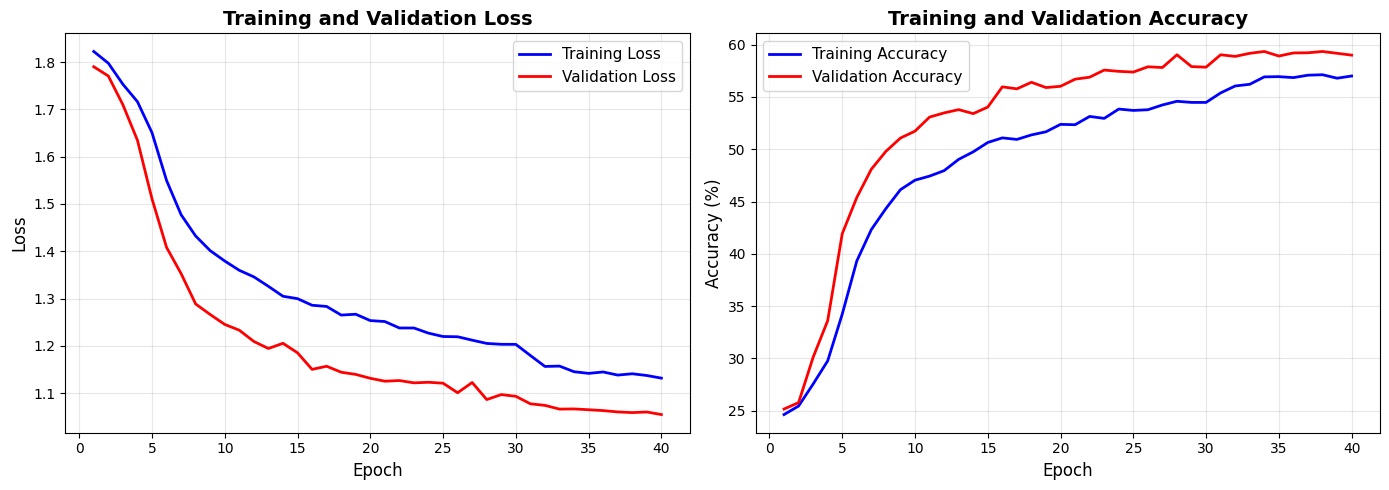


Generating confusion matrix...
Confusion matrix saved to: experiments/confusion_matrices/confusion_matrix.png


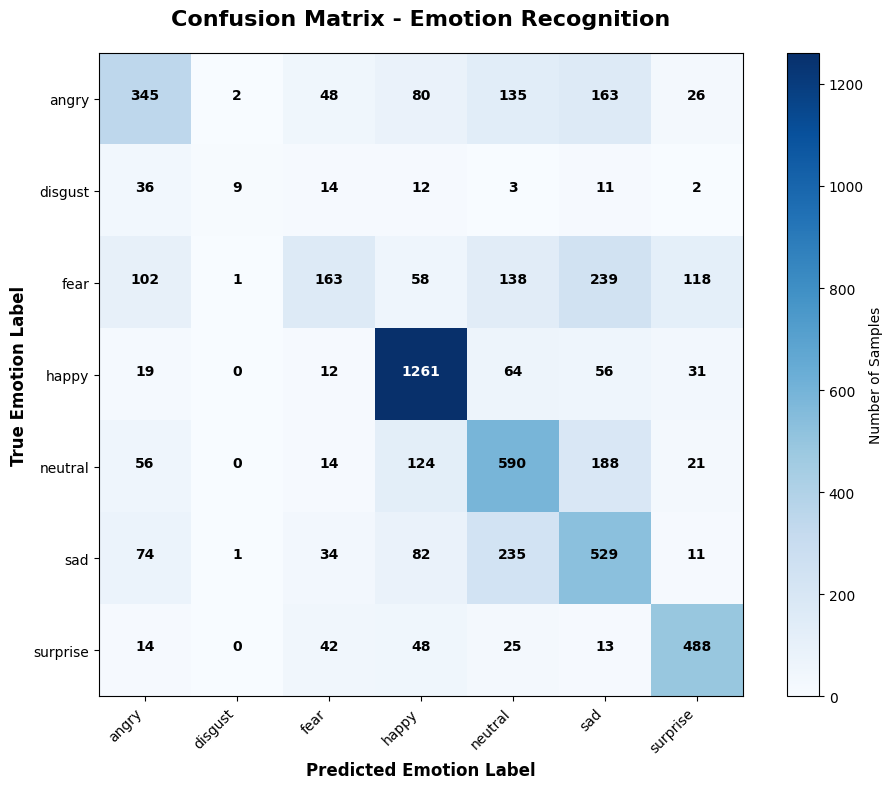


CLASSIFICATION REPORT
              precision    recall  f1-score   support

       angry     0.5341    0.4318    0.4775       799
     disgust     0.6923    0.1034    0.1800        87
        fear     0.4985    0.1990    0.2845       819
       happy     0.7574    0.8739    0.8115      1443
     neutral     0.4958    0.5942    0.5405       993
         sad     0.4412    0.5476    0.4887       966
    surprise     0.7001    0.7746    0.7355       630

    accuracy                         0.5900      5737
   macro avg     0.5885    0.5035    0.5026      5737
weighted avg     0.5835    0.5900    0.5706      5737


CONFUSING PAIRS ANALYSIS

Fear Vs Surprise:
  Confusions: 118 vs 42
  Confusion rates: 14.41% vs 6.67%

Angry Vs Disgust:
  Confusions: 2 vs 36
  Confusion rates: 0.25% vs 41.38%

Neutral Vs Sad:
  Confusions: 188 vs 235
  Confusion rates: 18.93% vs 24.33%

All done! Model saved and results visualized.



In [33]:
# Pull latest code and clear all caches
import os
import sys

# 1. Pull latest changes
print("Pulling latest code from GitHub...")
!cd /content/deep_learning_final_project && git pull

# 2. Clear ALL Python module caches
print("\nClearing Python module cache...")
modules_to_remove = [key for key in list(sys.modules.keys()) if any(x in key for x in ['train', 'model', 'utils', 'config'])]
for module in modules_to_remove:
    del sys.modules[module]
print(f"✓ Removed {len(modules_to_remove)} cached modules")

# 3. Verify the fix is in the file
print("\nVerifying class weights fix...")
with open('/content/deep_learning_final_project/src/train.py', 'r') as f:
    content = f.read()
    if 'class_weights' in content and 'CrossEntropyLoss(weight=class_weights' in content:
        print("✓ Class weights fix is present!")
    else:
        print("WARNING: Class weights fix not found!")

# 4. Set data directory
os.environ['DATA_DIR'] = '/content/data'

# 5. Import fresh (no cache)
print("\nImporting fresh modules...")
from train import main

print("\n" + "="*70)
print("Starting training with class weights fix...")
print("="*70 + "\n")

main()

## Check results

In [34]:
model_path = "/content/models/cnn_model.pth"
if os.path.exists(model_path):
    size_mb = os.path.getsize(model_path) / (1024 * 1024)
    print(f"Model saved: {size_mb:.2f} MB")

    # Copy model to Drive so it persists after runtime disconnects
    drive_model_path = '/content/drive/MyDrive/models/cnn_model.pth'
    os.makedirs(os.path.dirname(drive_model_path), exist_ok=True)
    shutil.copy2(model_path, drive_model_path)
    print(f"Model copied to Drive: {drive_model_path}")
else:
    print("Model not found")

# Check visualization files
for viz_dir in ["/content/experiments/training_curves", "/content/experiments/confusion_matrices"]:
    if os.path.exists(viz_dir):
        files = os.listdir(viz_dir)
        if files:
            print(f"{viz_dir}: {files}")
            shutil.copytree(viz_dir, f'/content/drive/MyDrive/experiments/{os.path.basename(viz_dir)}', dirs_exist_ok=True)

Model saved: 10.50 MB
Model copied to Drive: /content/drive/MyDrive/models/cnn_model.pth
/content/experiments/training_curves: ['training_history.png']
/content/experiments/confusion_matrices: ['confusion_matrix.png']


## Training curves

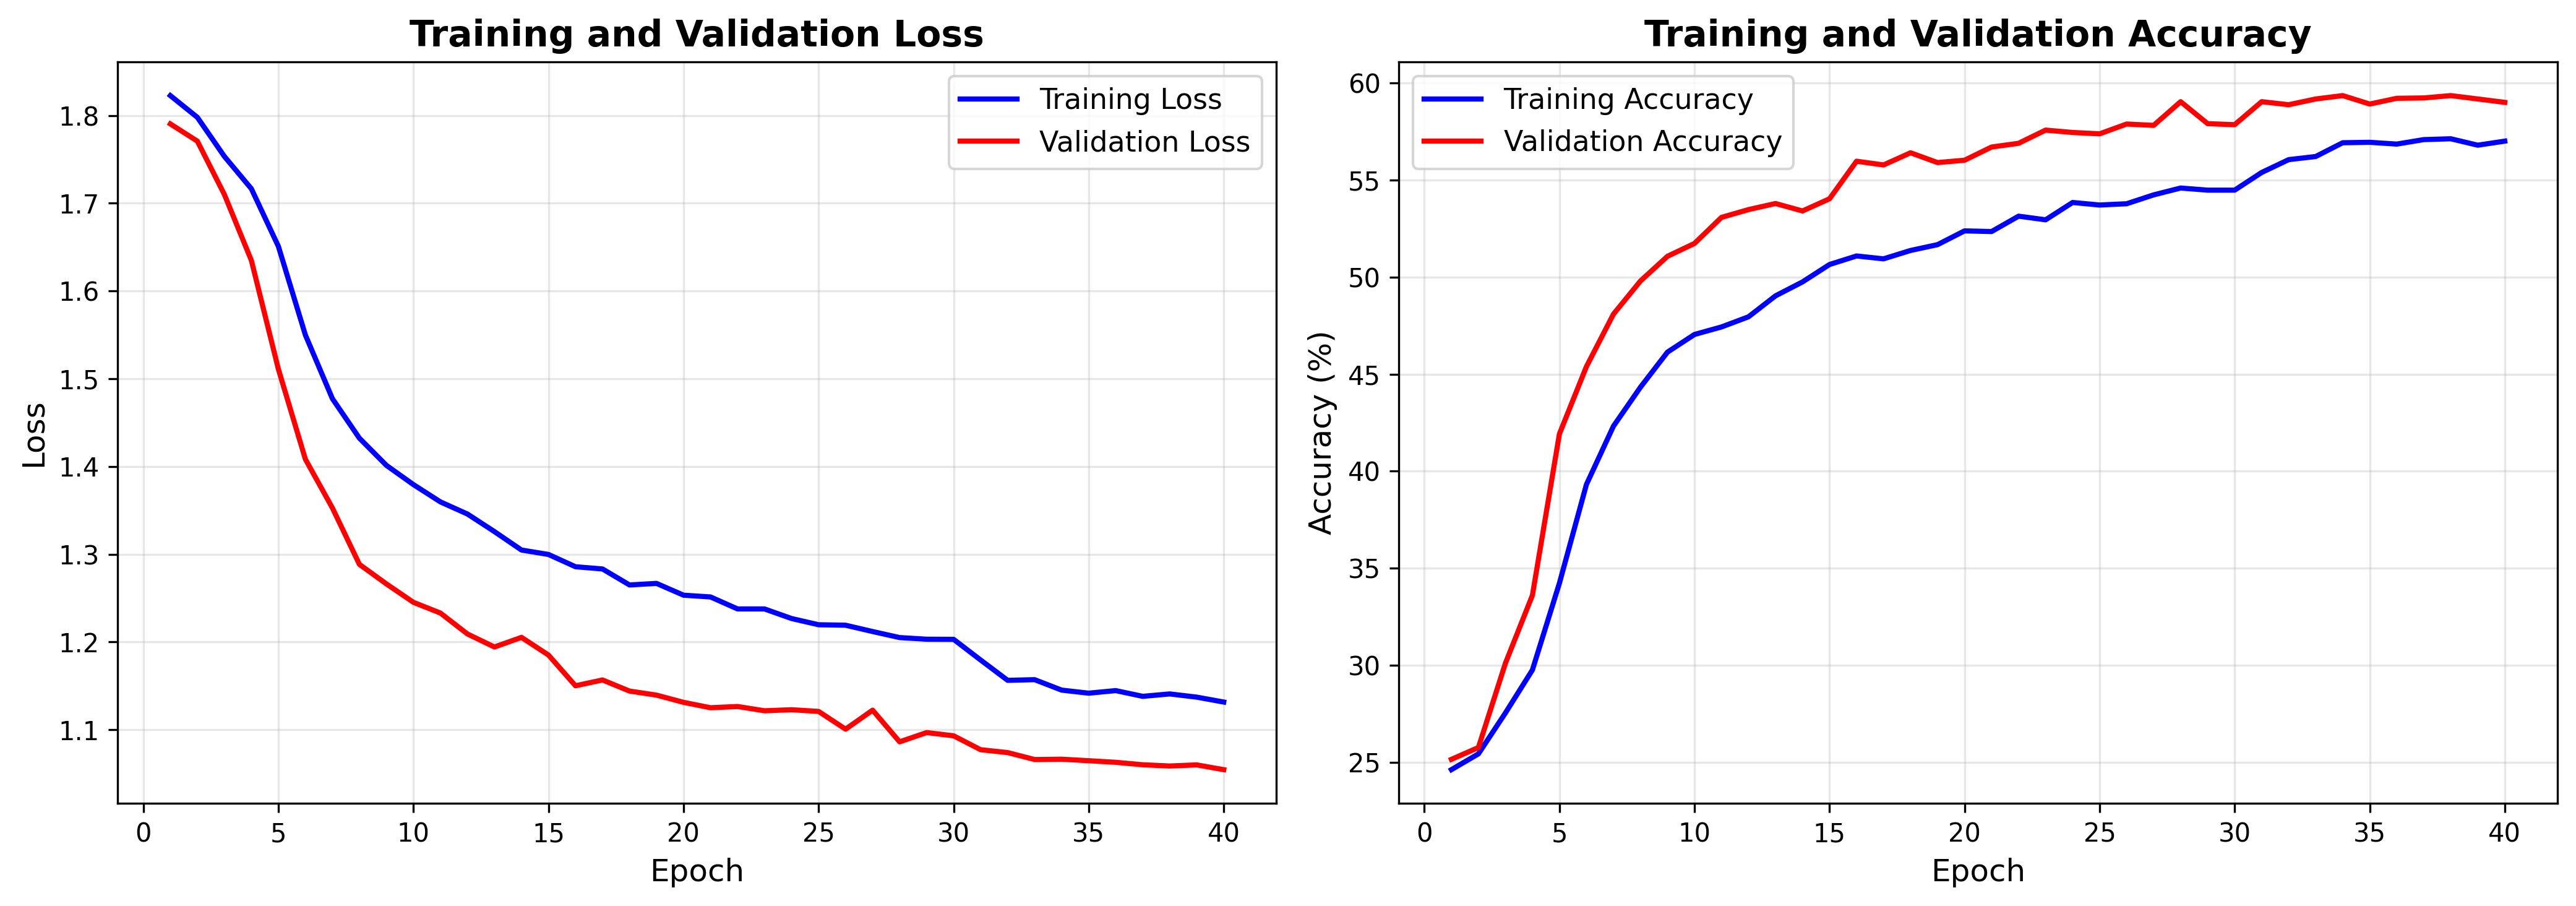

In [35]:
from IPython.display import Image, display

curve_path = "experiments/training_curves/training_history.png"
if os.path.exists(curve_path):
    display(Image(curve_path))

## Confusion matrix

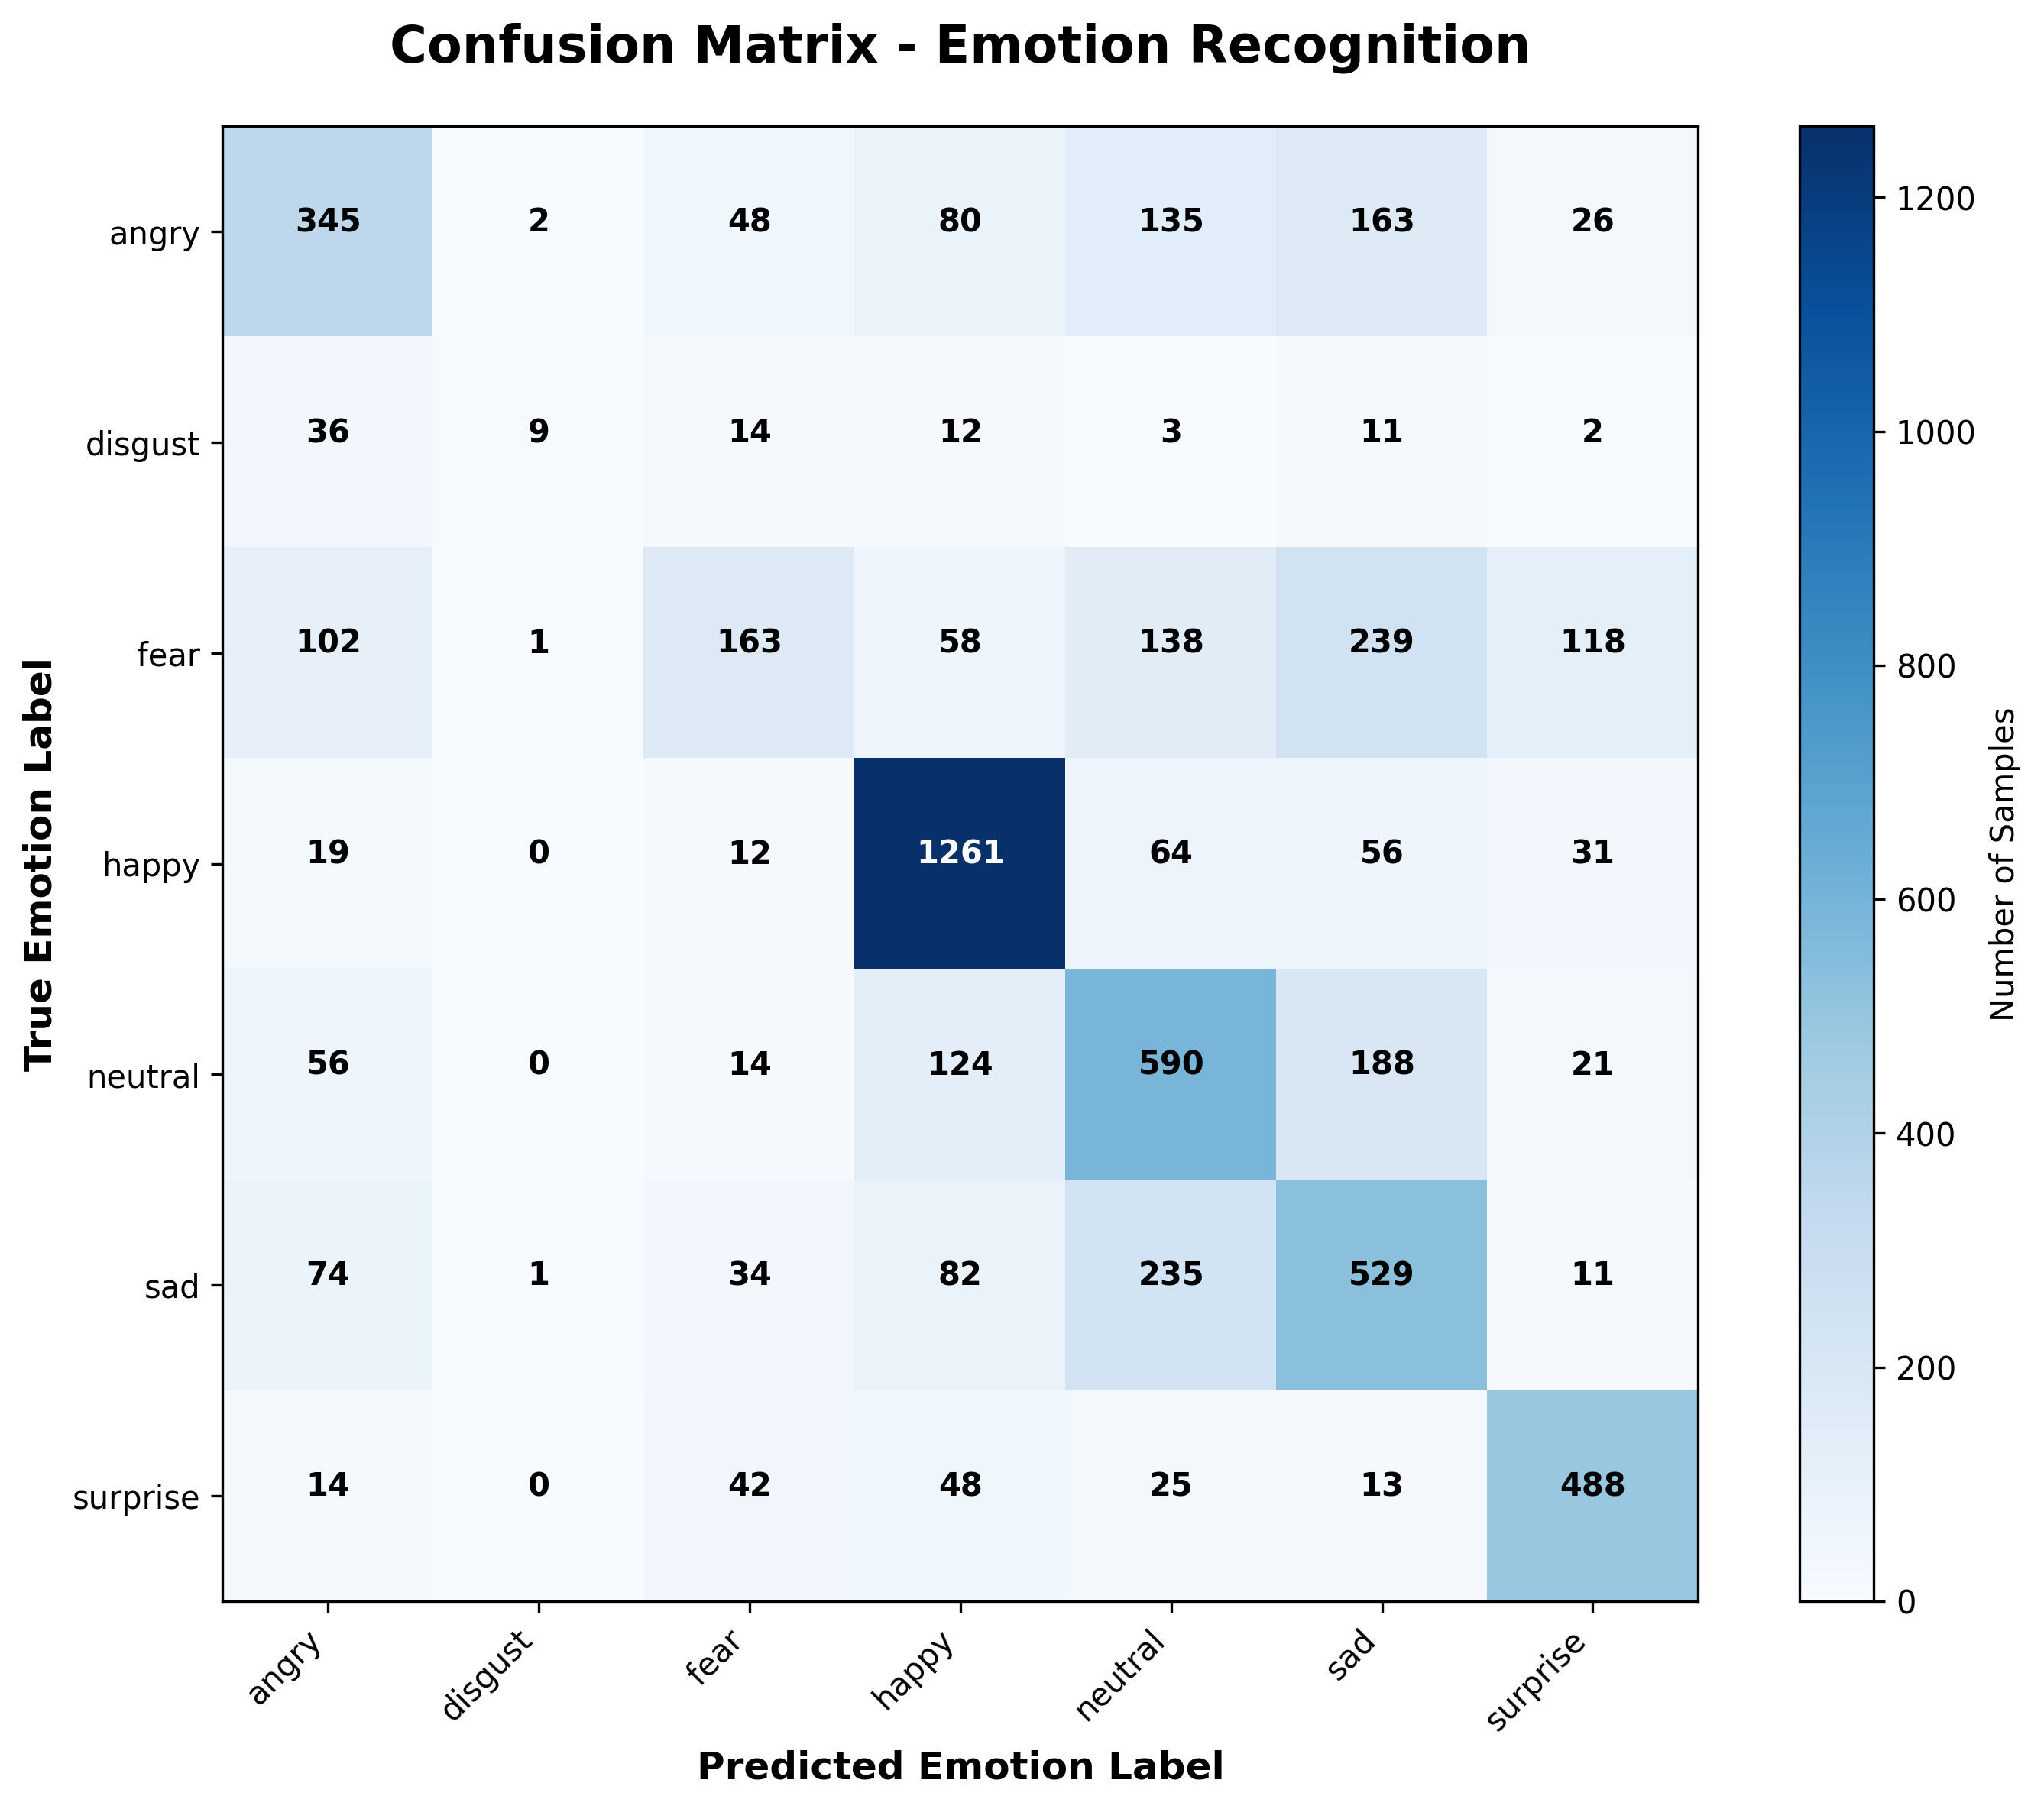

In [36]:
cm_path = "experiments/confusion_matrices/confusion_matrix.png"
if os.path.exists(cm_path):
    display(Image(cm_path))

## Done

Model saved in models/ folder. Use run_inference.ipynb for webcam demo.